In [10]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "project_report"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [11]:
import zipfile
import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00507/"
WISDM_PATH = os.path.join("datasets", "wisdm")
WISDM_URL = DOWNLOAD_ROOT + "wisdm-dataset.zip"

def fetch_wisdm_data(wisdm_url=WISDM_URL, wisdm_path=WISDM_PATH):
    if not os.path.isdir(wisdm_path):
        os.makedirs(wisdm_path)
    zip_path = os.path.join(wisdm_path, "wisdm-dataset.zip")
    if not os.path.isfile(zip_path):
        urllib.request.urlretrieve(wisdm_url, zip_path)
    uncompressed_path = os.path.join(wisdm_path, "wisdm-dataset")
    if not os.path.isdir(uncompressed_path):
        with zipfile.ZipFile(zip_path,"r") as zip_ref:
            zip_ref.extractall(wisdm_path)

In [12]:
fetch_wisdm_data()

In [13]:
def load_raw_wisdm_data(subjectId, device, sensor, wisdm_path=WISDM_PATH):
    """
        Charge les données brutes.
        device : 'phone' ou 'watch'
        sensor : 'accel' ou 'gyro'
    """
    subjectIdStr = str(subjectId)
    rawPath = os.path.join(WISDM_PATH,'wisdm-dataset','raw',device,sensor,'data_'+subjectIdStr+'_'+sensor+'_'+device+'.txt')
    f = open(rawPath, 'r')
    lines = f.readlines()
    data=[[],[],[]]
    timestamp=[]
    series={}
    activities=[]
    for l in lines:
        spt=l.split(',')
        activities.append(spt[1])
        data[0].append(float(spt[3]))
        data[1].append(float(spt[4]))
        data2=spt[5].split(';')[0]
        data[2].append(float(data2))
        timestamp.append(int(spt[2]))
    f.close()
    #d={'activity': activities, 'x': data[0], 'y': data[1], 'z': data[2]}
    d={'time': timestamp, 'activity': activities, 'x': data[0], 'y': data[1], 'z': data[2]}
    df=pd.DataFrame(data=d, index=pd.to_datetime(timestamp))
    #df=pd.DataFrame(data=d)
    
    activities = df['activity'].unique()
    for activity in activities:
        serie = df.loc[df['activity']==activity]
        timestamp=serie['time'].to_numpy()
        timestamp = [(x-timestamp[0])*10**-9 for x in timestamp]
        df.loc[df['activity']==activity, 'time']=timestamp
    return df

In [14]:
# library for reading arff file
# You can install it via 'pip install liac-arff'
# https://pypi.org/project/liac-arff/ for more informations
import arff
import pandas as pd

def load_wisdm_data(subjectId, device, sensor, wisdm_path=WISDM_PATH):
    """
        Charge les données pré-traitées.
        device : 'phone' ou 'watch'
        sensor : 'accel' ou 'gyro'
    """
    subjectIdStr = str(subjectId)
    arffPath = os.path.join(WISDM_PATH,'wisdm-dataset','arff_files',device,sensor,'data_'+subjectIdStr+'_'+sensor+'_'+device+'.arff')
    f=open(arffPath, 'r')
    data = arff.load(f)
    attributesName = [data['attributes'][i][0] for i in range (len(data['attributes']))]
    dataFrame = pd.DataFrame(data = data['data'], columns=attributesName)
    f.close()
    return dataFrame

In [15]:
import random
import pandas as pd

SUBJECT_NUMBER = 51
FIRST_SUBJECT_ID=1600
SUBJECTSID = [i+FIRST_SUBJECT_ID for i in range(SUBJECT_NUMBER)]
#Le sujet 1614 n'est pas dans la liste ...
SUBJECTSID.remove(1614)

def load_all_wisdm_data(device, sensor):

    subject = load_wisdm_data(1600, device, sensor) 
    subjectsDf = pd.DataFrame(columns=subject.columns)
    for e in SUBJECTSID:
        subjectDf = load_wisdm_data(e, device, sensor)
        subjectsDf = subjectsDf.append(subjectDf)
    return subjectsDf

In [16]:
def toFrench(word):
    switcher={
                'phone':'téléphone',
                'watch':'montre',
                'accel':'accéléromètre',
                'gyro':'gyroscope'
             }
    return switcher.get(word)

# Les Figures

## Figure 1

Saving figure Figure 1


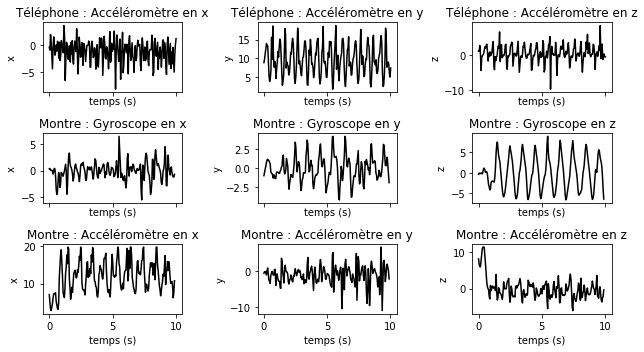

In [17]:
series_phone_gyro=load_raw_wisdm_data(1600, 'phone', 'gyro')
series_phone_accel=load_raw_wisdm_data(1600, 'phone', 'accel')
series_watch_accel=load_raw_wisdm_data(1600, 'watch', 'accel')
series_watch_gyro=load_raw_wisdm_data(1600, 'watch', 'gyro')

serie_A_phone_gyro = series_phone_gyro.loc[series_phone_gyro['activity']=='A'][0:200]
serie_A_phone_accel = series_phone_accel.loc[series_phone_accel['activity']=='A'][0:200]
serie_A_watch_accel = series_watch_accel.loc[series_watch_accel['activity']=='A'][0:200]
serie_A_watch_gyro = series_watch_gyro.loc[series_watch_gyro['activity']=='A'][0:200]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9,5), sharex='all')
plt.subplots_adjust(hspace = 0.4)

# axs[0, 0].set_title('Téléphone : Gyroscope en x')
# axs[0, 0].set_xlabel('temps (s)')
# axs[0, 0].set_ylabel('x')
# axs[0, 0].plot(serie_A_phone_gyro['time'],serie_A_phone_gyro['x'],color='k')

# axs[0, 1].set_title('Téléphone : Gyroscope en y')
# axs[0, 1].set_xlabel('temps (s)')
# axs[0, 1].set_ylabel('y')
# axs[0, 1].plot(serie_A_phone_gyro['time'],serie_A_phone_gyro['y'], color='k')

# axs[0, 2].set_title('Téléphone : Gyroscope en z')
# axs[0, 2].set_xlabel('temps (s)')
# axs[0, 2].set_ylabel('z')
# axs[0, 2].plot(serie_A_phone_gyro['time'],serie_A_phone_gyro['z'], color='k')

axs[0, 0].set_title('Téléphone : Accéléromètre en x')
axs[0, 0].set_xlabel('temps (s)')
axs[0, 0].set_ylabel('x')
axs[0, 0].plot(serie_A_phone_accel['time'],serie_A_phone_accel['x'], color='k')

axs[0, 1].set_title('Téléphone : Accéléromètre en y')
axs[0, 1].set_xlabel('temps (s)')
axs[0, 1].set_ylabel('y')
axs[0, 1].plot(serie_A_phone_accel['time'],serie_A_phone_accel['y'], color='k')

axs[0, 2].set_title('Téléphone : Accéléromètre en z')
axs[0, 2].set_xlabel('temps (s)')
axs[0, 2].set_ylabel('z')
axs[0, 2].plot(serie_A_phone_accel['time'],serie_A_phone_accel['z'], color='k')

axs[1, 0].set_title('Montre : Gyroscope en x')
axs[1, 0].set_xlabel('temps (s)')
axs[1, 0].set_ylabel('x')
axs[1, 0].plot(serie_A_watch_gyro['time'],serie_A_watch_gyro['x'], color='k')

axs[1, 1].set_title('Montre : Gyroscope en y')
axs[1, 1].set_xlabel('temps (s)')
axs[1, 1].set_ylabel('y')
axs[1, 1].plot(serie_A_watch_gyro['time'],serie_A_watch_gyro['y'], color='k')

axs[1, 2].set_title('Montre : Gyroscope en z')
axs[1, 2].set_xlabel('temps (s)')
axs[1, 2].set_ylabel('z')
axs[1, 2].plot(serie_A_watch_gyro['time'],serie_A_watch_gyro['z'], color='k')

axs[2, 0].set_title('Montre : Accéléromètre en x')
axs[2, 0].set_xlabel('temps (s)')
axs[2, 0].set_ylabel('x')
axs[2, 0].plot(serie_A_watch_accel['time'],serie_A_watch_accel['x'], color='k')

axs[2, 1].set_title('Montre : Accéléromètre en y')
axs[2, 1].set_xlabel('temps (s)')
axs[2, 1].set_ylabel('y')
axs[2, 1].plot(serie_A_watch_accel['time'],serie_A_watch_accel['y'], color='k')

axs[2, 2].set_title('Montre : Accéléromètre en z')
axs[2, 2].set_xlabel('temps (s)')
axs[2, 2].set_ylabel('z')
axs[2, 2].plot(serie_A_watch_accel['time'],serie_A_watch_accel['z'], color='k')

save_fig("Figure 1")

# attributes_to_keep = ['X7','X8','Y1','Y2']

# subject1600_phone_accel[attributes_to_keep].hist(bins = 25, color = "black")
# save_fig("Figure 5")
plt.show()

# Figure 2

Saving figure Figure 2


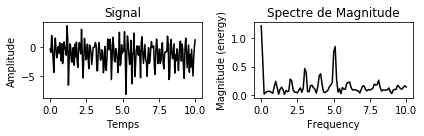

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

axes[0].set_title("Signal")
axes[0].plot(serie_A_phone_accel['time'], serie_A_phone_accel['x'], color='k')
axes[0].set_xlabel("Temps")
axes[0].set_ylabel("Amplitude")

axes[1].set_title("Spectre de Magnitude")
axes[1].magnitude_spectrum(serie_A_phone_accel['x'],Fs=20, color='k')

save_fig("Figure 2")

plt.show()

## Figure 3

Saving figure Figure 3


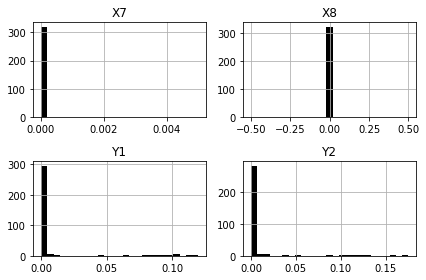

In [22]:
subject1600_phone_accel = load_wisdm_data(1600, 'phone', 'accel')

features_to_keep = ['X7','X8','Y1','Y2']

subject1600_phone_accel[features_to_keep].hist(bins = 25, color = "black")
save_fig("Figure 3")
plt.show()

## Figure 4

Saving figure Figure 4


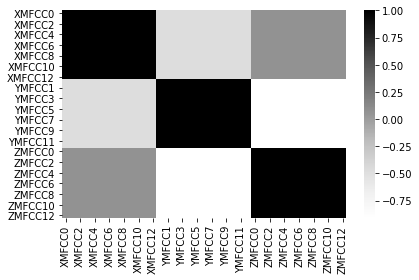

In [21]:
corr_matrix = subject1600_phone_accel.corr()
corr_matrix = corr_matrix**2

elements1=['XMFCC','YMFCC','ZMFCC']
attributes=[e+str(i) for e in elements1 for i in range (0,13)]

power_spectrum_corr=corr_matrix[attributes].loc[attributes]

fig = plt.subplots()
heat_map = sns.heatmap(power_spectrum_corr.corr(),cmap='Greys')

save_fig("Figure 4")

plt.show()

## Figure 5

Saving figure Figure 5.1


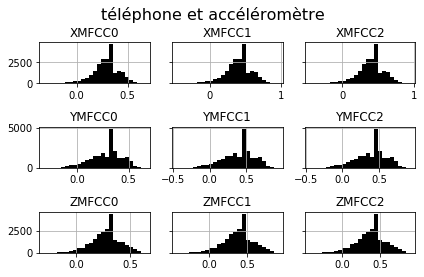

Saving figure Figure 5.2


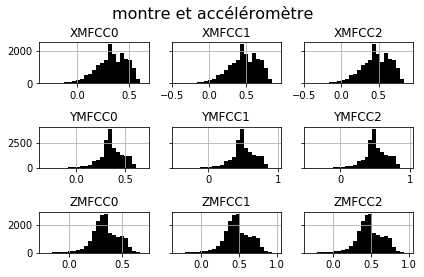

Saving figure Figure 5.3


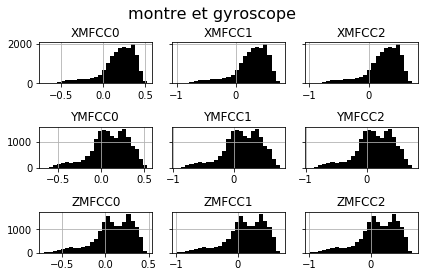

In [23]:
subjects_phone_accel = load_all_wisdm_data('phone', 'accel')

t1=['XMFCC','YMFCC','ZMFCC']
features_to_keep=[e+str(i) for e in t1 for i in range (0,3)]

i=1
for device in ['phone','watch']:
    for sensor in ['accel','gyro']:
        if(not(device=='phone' and sensor=='gyro')):
            fig, ax = plt.subplots(3, 3, sharey='row')
            fig.suptitle(toFrench(device)+' et '+toFrench(sensor),fontsize=16)
            
            subjects = load_all_wisdm_data(device, sensor)
            subjects[features_to_keep].hist(bins = 25, color='black', ax=ax)
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            save_fig("Figure 5.%s"%i,tight_layout=False)
            plt.show()
            i=i+1

## Figure 6

Saving figure Figure 6.1


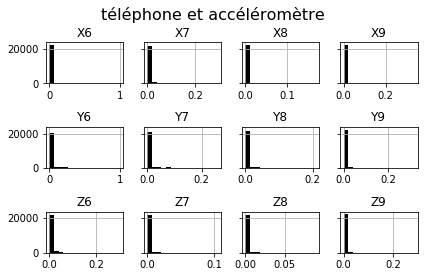

Saving figure Figure 6.2


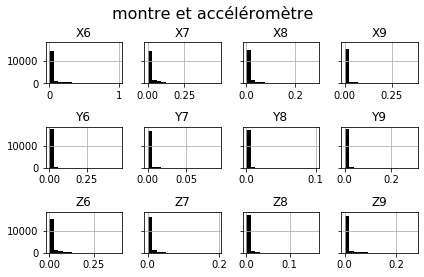

Saving figure Figure 6.3


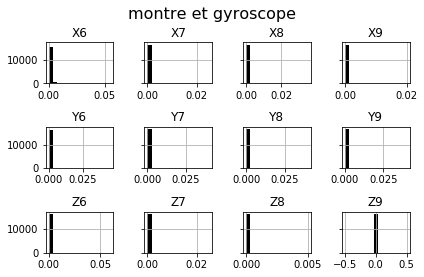

In [24]:

t2=['X','Y','Z']
features_to_keep=[e+str(i) for e in t2 for i in range (6,10)]
k=1
for device in ['phone','watch']:
    for sensor in ['accel','gyro']:
        if(not(device=='phone' and sensor=='gyro')):
            subjects = load_all_wisdm_data(device, sensor)
            fig, ax = plt.subplots(3, 4, sharey='all')
            fig.suptitle(toFrench(device)+' et '+toFrench(sensor),fontsize=16)

            m=0
            for i in range(3):
                for j in range(4):

                    subjects[features_to_keep].hist(column = subjects[features_to_keep].columns[m], bins = 15, ax=ax[i,j], color="black")
                    m+=1
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            save_fig("Figure 6.%s"%k,tight_layout=False)
            plt.show()
            k=k+1

## Figure 7

Saving figure Figure 7.1


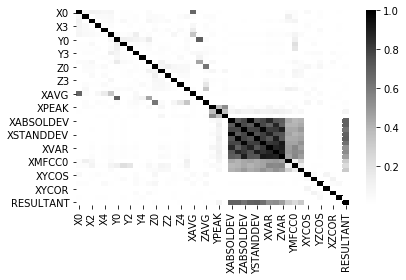

Saving figure Figure 7.2


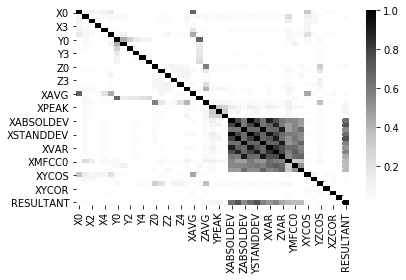

Saving figure Figure 7.3


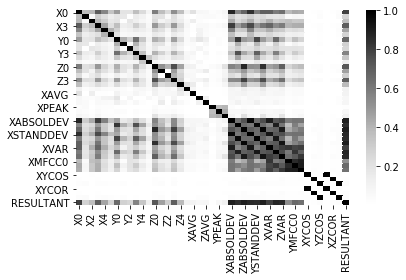

In [25]:
t1=['XMFCC','YMFCC','ZMFCC']
attributes1=[e+str(i) for e in t1 for i in range (1,13)]

t2=['X','Y','Z']
attributes2=[e+str(i) for e in t2 for i in range (6,10)]

attributes_to_drop=attributes1+attributes2
i=1
for device in ['phone','watch']:
    for sensor in ['accel','gyro']:
        if(not(device=='phone' and sensor=='gyro')):
            subjects = load_all_wisdm_data(device, sensor)
            reducedSubjects1=subjects.drop(attributes_to_drop, axis=1)
            heat_map = sns.heatmap(reducedSubjects1.corr()**2, cmap='Greys')

            save_fig("Figure 7.%s"%i)

            plt.show()
            i=i+1


## Figure 8

In [26]:
t1=['XMFCC','YMFCC','ZMFCC']
attributes1=[e+str(i) for e in t1 for i in range (1,13)]
NOT_RELEVANT_FEATURES = {}
NOT_RELEVANT_FEATURES["similar"]=attributes1

t2=['X','Y','Z']
attributes2=[e+str(i) for e in t2 for i in range (6,10)]
NOT_RELEVANT_FEATURES["low_variance"]=attributes2

attributes3=['YABSOLDEV','ZABSOLDEV','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR']
NOT_RELEVANT_FEATURES["correlated"]=attributes3

Feature ranking:
Saving figure Figure 8


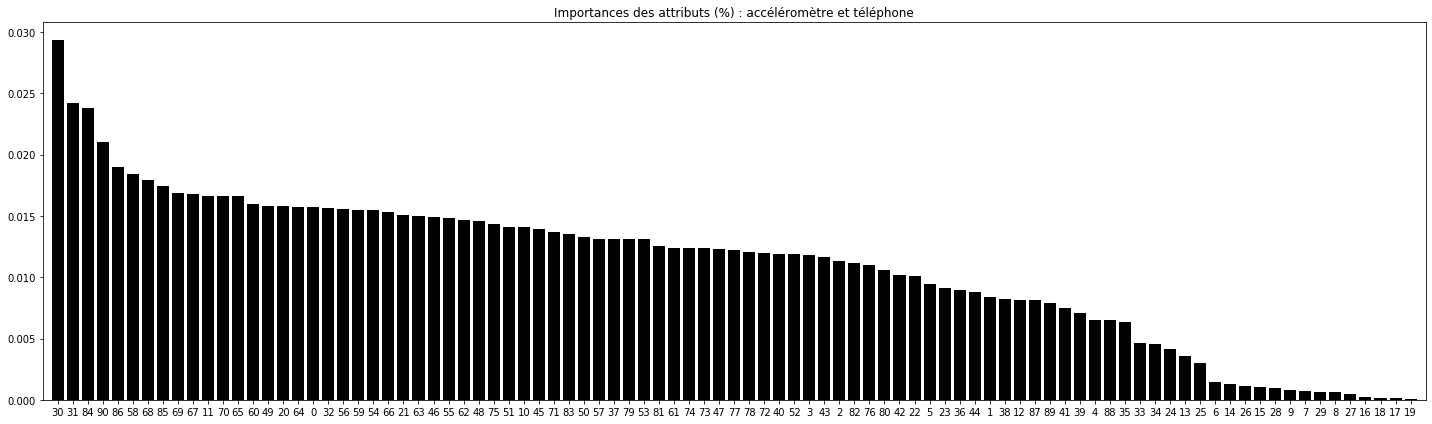

Feature ranking:
Saving figure Figure 9


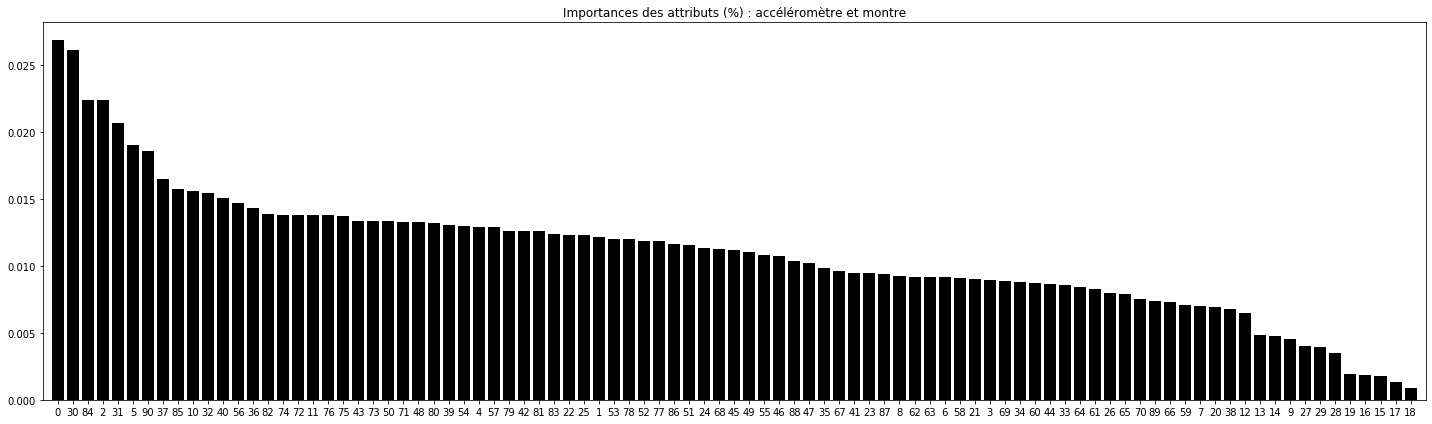

Feature ranking:
Saving figure Figure 10


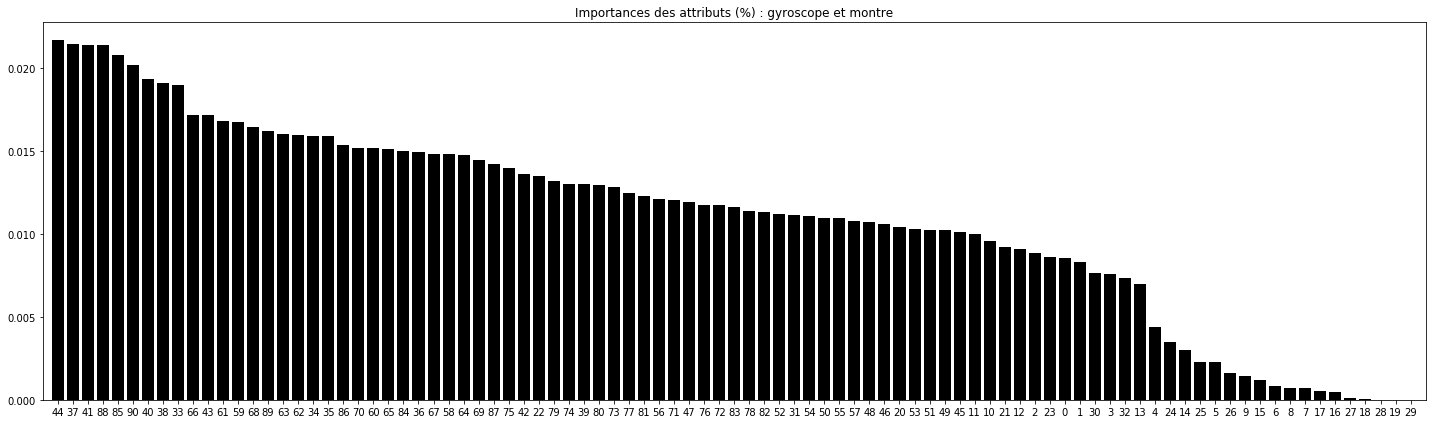

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

globalImportances = np.array([])
features_to_drop=['ACTIVITY','class']
importances_by_device={}
pd.options.display.max_rows = 999

i=8
for device in ['phone','watch']:
    for sensor in ['accel','gyro']:
        if(not(device=='phone' and sensor=='gyro')):
            for subjectId in SUBJECTSID:
                forest = ExtraTreesClassifier(n_estimators=100,
                                  random_state=0)

                subject = load_wisdm_data(subjectId, device, sensor)
                y=subject['ACTIVITY']
                X=subject.drop(features_to_drop, axis=1)

                forest.fit(X, y)


                importances = forest.feature_importances_

                #mean of importances
                if(len(globalImportances)==0):
                    globalImportances = importances
                else:
                    globalImportances = (globalImportances + importances) / 2.0

            indices = np.argsort(globalImportances)[::-1]

            #Les attributs restant triés par ordre d'importance
            SORTED_FEATURES=X.columns[indices]

            # Print the feature ranking
            print("Feature ranking:")

            df=pd.DataFrame()
            df['feature_number']=indices
            df['feature_name']=X.columns[indices]
            df['importance']=globalImportances[indices]
            df['importance']=df['importance'].map('{:,.4f}'.format)
            #display(df)
            importances_by_device[device+'_'+sensor]=df

            # Plot the feature importances of the forest
            plt.figure(figsize=(20,6))
            plt.title("Importances des attributs (%) : "+toFrench(sensor)+' et '+toFrench(device))
            plt.bar(range(X.shape[1]), globalImportances[indices],
                   color="black", align="center")
            plt.xticks(range(X.shape[1]), indices)
            plt.xlim([-1, X.shape[1]])
            save_fig("Figure "+str(i))
            plt.show()
            
            i=i+1

In [28]:
df2=df.copy(deep=True)
df2['importance']=pd.to_numeric(df2['importance'])*100
df2=df2.rename(columns={'importance':'importance (%)'})
file=os.path.join(IMAGES_PATH,'Importance des attributs.csv')
df2.sort_values(by=['feature_number'],ignore_index=True).to_csv(file,index=False)